#### Introduction to Support Vector Regression (SVR)

Support Vector Regression (SVR) is a type of machine learning algorithm used for regression analysis. The goal of SVR is to find a function that approximates the relationship between the input variables and a continuous target variable, while minimizing the prediction error.

Unlike Support Vector Machines (SVMs) used for classification tasks, SVR seeks to find a hyperplane that best fits the data points in a continuous space. This is achieved by mapping the input variables to a high-dimensional feature space and finding the hyperplane that maximizes the margin (distance) between the hyperplane and the closest data points, while also minimizing the prediction error.

SVR can handle non-linear relationships between the input variables and the target variable by using a kernel function to map the data to a higher-dimensional space. This makes it a powerful tool for regression tasks where there may be complex relationships between the input variables and the target variable.

Support Vector Regression (SVR) uses the same principle as SVM, but for regression problems. Let’s spend a few minutes understanding the idea behind SVR.


#### The Idea Behind Support Vector Regression

The problem of regression is to find a function that approximates mapping from an input domain to real numbers on the basis of a training sample. So let’s now dive deep and understand how SVR works actually.

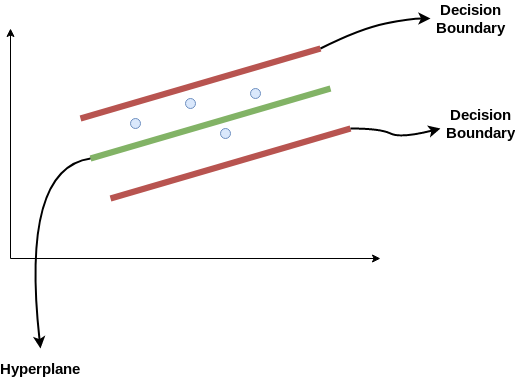
 
Consider these two red lines as the decision boundary and the green line as the hyperplane. Our objective, when we are moving on with SVR, is to basically consider the points that are within the decision boundary line. Our best fit line is the hyperplane that has a maximum number of points.

The first thing that we’ll understand is what is the decision boundary (the danger red line above!). Consider these lines as being at any distance, say ‘a’, from the hyperplane. So, these are the lines that we draw at distance ‘+a’ and ‘-a’ from the hyperplane. This ‘a’ in the text is basically referred to as epsilon.
Assuming that the equation of the hyperplane is as follows:

Y = wx+b (equation of hyperplane)

Then the equations of decision boundary become:

wx+b= +a

wx+b= -a

Thus, any hyperplane that satisfies our SVR should satisfy:
-a < Y- wx+b < +a 

Our main aim here is to decide a decision boundary at ‘a’ distance from the original hyperplane such that data points closest to the hyperplane or the support vectors are within that boundary line.
Hence, we are going to take only those points that are within the decision boundary and have the least error rate, or are within the Margin of Tolerance. This gives us a better fitting model.


In [11]:
from sklearn.datasets import fetch_openml

# Load the Boston housing dataset
boston = fetch_openml(name='boston', version=1)

# Print the description of the dataset
print(boston.DESCR)

# Extract feature names and target variable name
feature_names = boston.feature_names
target_name = boston.target_names

# Print feature names
print("Features:")
for i, feature in enumerate(feature_names):
    print(f"{i+1}. {feature}")

# Print target variable name
print("Target Variable:")
print(target_name)


**Author**:   
**Source**: Unknown - Date unknown  
**Please cite**:   

The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
prices and the demand for clean air', J. Environ. Economics & Management,
vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
...', Wiley, 1980.   N.B. Various transformations are used in the table on
pages 244-261 of the latter.
Variables in order:
CRIM     per capita crime rate by town
ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS    proportion of non-retail business acres per town
CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX      nitric oxides concentration (parts per 10 million)
RM       average number of rooms per dwelling
AGE      proportion of owner-occupied units built prior to 1940
DIS      weighted distances to five Boston employment centres
RAD      index of accessibility to radial highways
TAX      full-value property-tax rate per $10

C:\Users\Faraz Ahmad\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


C:\Users\Faraz Ahmad\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Mean Squared Error: 28.91852267161814


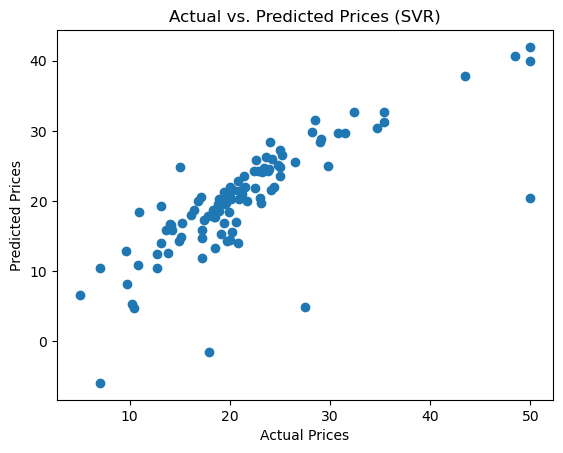

In [9]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Load the Boston housing dataset
boston = fetch_openml(name='boston', version=1)
X, y = boston.data, boston.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the SVR model
svr = SVR(kernel='linear')
svr.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svr.predict(X_test_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Plotting
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices (SVR)")
plt.show()


In [10]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)


Mean Squared Error: 28.91852267161814
Root Mean Squared Error: 5.377594506061064
R-squared: 0.6056589279132618



In the case of SVM regression, we're specifically using Support Vector Machines (SVMs) for regression tasks. SVM regression aims to find a hyperplane that best fits the data points in a higher-dimensional space while minimizing the error between the actual and predicted target values.

Unlike linear regression, where the model tries to fit a straight line to the data points, SVM regression can handle nonlinear relationships between the features and the target variable by using different kernels such as linear, polynomial, radial basis function (RBF), etc. These kernels transform the input features into higher-dimensional spaces, allowing for more complex decision boundaries.

So, in the context of SVM regression, we're not fitting a simple linear relationship between the features and target variable as in linear regression. Instead, we're using a more flexible approach that can capture nonlinear relationships through the use of kernel functions. The choice of kernel and other hyperparameters can significantly impact the performance of the SVM regression model.

#### Random Forest Classifier:

Random Forest Classifier is used for classification tasks, where the target variable is categorical or discrete.
It builds multiple decision trees during training and combines their predictions through voting (for classification) to make the final prediction.
Each decision tree in the forest is trained on a bootstrapped sample of the training data, and at each node of the tree, a random subset of features is considered for splitting.
The final prediction is determined by the majority class predicted by the individual trees.

#### Random Forest Regressor:

Random Forest Regressor is used for regression tasks, where the target variable is continuous.
Similar to the classifier, it also builds multiple decision trees during training, but instead of voting, it averages the predictions of all the trees to make the final prediction.
Each decision tree in the forest is trained on a bootstrapped sample of the training data, and at each node of the tree, a random subset of features is considered for splitting.
The final prediction is the average of the predictions made by all the trees in the forest.

The underlying algorithm of Random Forest Classifier and Random Forest Regressor is essentially the same, with the main difference lying in the type of task they are designed for (classification vs. regression) and the way they handle the output.

However, there are some nuanced differences in the implementation and interpretation:

Output Handling:

In Random Forest Classifier, the output is discrete and represents class labels. The final prediction is typically determined by a majority vote among the trees.
In Random Forest Regressor, the output is continuous and represents numerical values. The final prediction is typically the average of the predictions made by all the trees.
Evaluation Metrics:

Since Random Forest Classifier deals with classification tasks, it is evaluated using classification-specific metrics such as accuracy, precision, recall, F1-score, etc.
Random Forest Regressor, being used for regression tasks, is evaluated using regression-specific metrics such as Mean Squared Error (MSE), Mean Absolute Error (MAE), R-squared, etc.
Decision Boundary:

In classification tasks, the decision boundary of a Random Forest Classifier may be more complex and nonlinear, as it is determined by the combined decisions of multiple trees.
In regression tasks, the decision boundary of a Random Forest Regressor is less about a boundary and more about the continuous prediction surface formed by the average of predictions from multiple trees.
Feature Importance Calculation:

Both classifiers and regressors can provide information about feature importance, but the interpretation might differ slightly. In classification, feature importance is often interpreted in terms of how much they contribute to predicting different classes, while in regression, it's more about their contribution to predicting the continuous target variable.
In essence, while the core algorithm remains the same, the differences lie in how the algorithm's outputs are handled, evaluated, and interpreted based on the nature of the task (classification vs. regression).

C:\Users\Faraz Ahmad\anaconda3\lib\site-packages\sklearn\datasets\_openml.py:932: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Mean Squared Error: 7.901513892156864
Root Mean Squared Error: 2.8109631609391226
R-squared: 0.8922527442109116


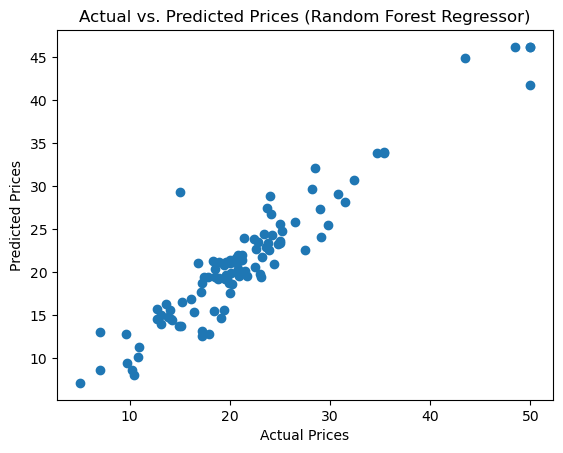

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the Boston housing dataset
boston = fetch_openml(name='boston', version=1)
X, y = boston.data, boston.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r_squared = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared:", r_squared)

# Plotting
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices (Random Forest Regressor)")
plt.show()


In [17]:
from sklearn.datasets import load_diabetes

# Load the diabetes dataset
diabetes = load_diabetes()

# Print the description of the dataset
print(diabetes.DESCR)

# Display the feature names
print("Feature names:", diabetes.feature_names)

# Display the shape of the data (number of samples, number of features)
print("Shape of data:", diabetes.data.shape)

# Display the target variable (response)
print("Target variable shape:", diabetes.target.shape)


.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SVM Regression
svm_regressor = SVR(kernel='rbf')
svm_regressor.fit(X_train, y_train)
svm_y_pred = svm_regressor.predict(X_test)

# Random Forest Regression
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_y_pred = rf_regressor.predict(X_test)

# Evaluate SVM Regression
svm_mse = mean_squared_error(y_test, svm_y_pred)
svm_rmse = np.sqrt(svm_mse)
svm_r_squared = r2_score(y_test, svm_y_pred)

print("SVM Regression Results:")
print("Mean Squared Error:", svm_mse)
print("Root Mean Squared Error:", svm_rmse)
print("R-squared:", svm_r_squared)

# Evaluate Random Forest Regression
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r_squared = r2_score(y_test, rf_y_pred)

print("\nRandom Forest Regression Results:")
print("Mean Squared Error:", rf_mse)
print("Root Mean Squared Error:", rf_rmse)
print("R-squared:", rf_r_squared)


SVM Regression Results:
Mean Squared Error: 4333.285954518086
Root Mean Squared Error: 65.82769899151941
R-squared: 0.18211365770500287

Random Forest Regression Results:
Mean Squared Error: 2952.0105887640448
Root Mean Squared Error: 54.332408273184846
R-squared: 0.4428225673999313
